# Ustawienia środowiska symulacji

W tym notebooku ustawiamy takie rzeczy jak data, pogoda, model Ziemi itp. Każda sekcja jest odpowiednio opisana i sformatowana, aby ułatwić korzystanie z pliku.

## Ustawienie czasu


In [ ]:
# Wyświetlenie dostępnych stref czasowych
import pytz

print(pytz.all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [ ]:
# Przykład ustawienia środowiska z określoną datą i strefą czasową
from rocketpy import Environment

env = Environment(
    date=(2025, 12, 18, 12),  # rok, miesiąc, dzień, godzina
    timezone="Europe/Warsaw"
)

### Ustawienie daty na jutro przy użyciu `datetime`

In [ ]:
from datetime import date, timedelta

tomorrow = date.today() + timedelta(days=1)

date_info = (tomorrow.year, tomorrow.month, tomorrow.day, 9)  # Godzina w czasie UTC

print("Data jutrzejsza:", date_info)

Tomorrow's date: (2025, 12, 19, 9)


## Ustawienie lokalizacji startu rakiety


In [ ]:
# Przykład ustawienia lokalizacji startu
from rocketpy import Environment

env = Environment()

env.set_location(latitude=32.988528, longitude=-106.975056)

env.prints.launch_site_details()


Launch Site Details

Launch Site Latitude: 32.98853°
Launch Site Longitude: -106.97506°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.0 m



**Przykładowe lokalizacje do testów:**

- Far-out: `latitude=35.35`, `longitude=-117.81`

- Toruń: `latitude=52.97`, `longitude=18.57`

### Wysokość nad poziomem morza

In [ ]:
# Ustawienie wysokości nad poziomem morza (jeśli znamy)
from rocketpy import Environment

env = Environment(elevation=110)

In [ ]:
# Możemy też ustawić wysokość później
env.set_elevation(120)

In [ ]:
# Przykład pobrania wysokości z Open-Elevation API (jeśli nie znamy)
env = Environment(
    date=(2019, 2, 10, 18),
    latitude=49.179577383781776,  # mniej więcej jak leżą Rysy
    longitude=20.088008357667263
)
env.set_elevation("Open-Elevation")

Fetching elevation from open-elevation.com for lat=49.179577383781776, lon=20.088008357667263...
Elevation received: 2352.0 m


## Model atmosfery
Ostatnią i najważniejszą rzeczą do ustawienia jest model atmosfery. Mamy do wyboru:

1. Standardowy

2. Własny

3. Prognozy

4. 

### Model standardowy

> **Uwaga:** Międzynarodowa Standardowa Atmosfera (ISA) ma poprawnie określone tylko profile temperatury i ciśnienia. Inne profile można wyprowadzić, jednak wiatry są automatycznie ustawione na 0 m/s.

Przydatne, jeśli chcemy mieć powtarzalne warunki do testów.

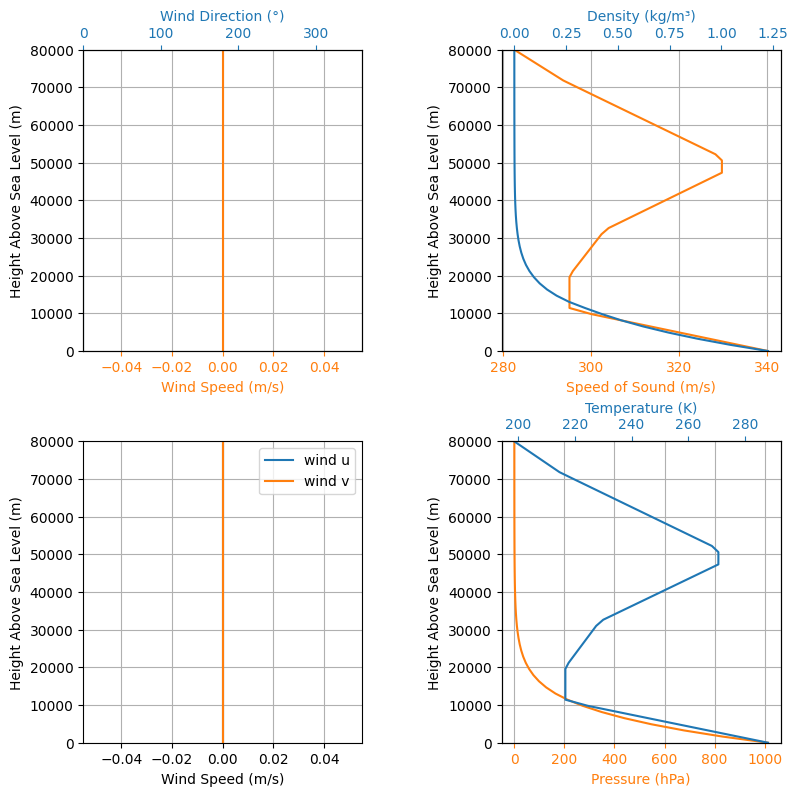

In [ ]:
# Inicjalizacja środowiska z modelem standardowym
from rocketpy import Environment

env = Environment()  # Domyślnie ustawia International Standard Atmosphere

env.plots.atmospheric_model()

### Własny model atmosfery

In [ ]:
# Przykład własnego modelu atmosfery
from rocketpy import Environment

env_custom_atm = Environment()

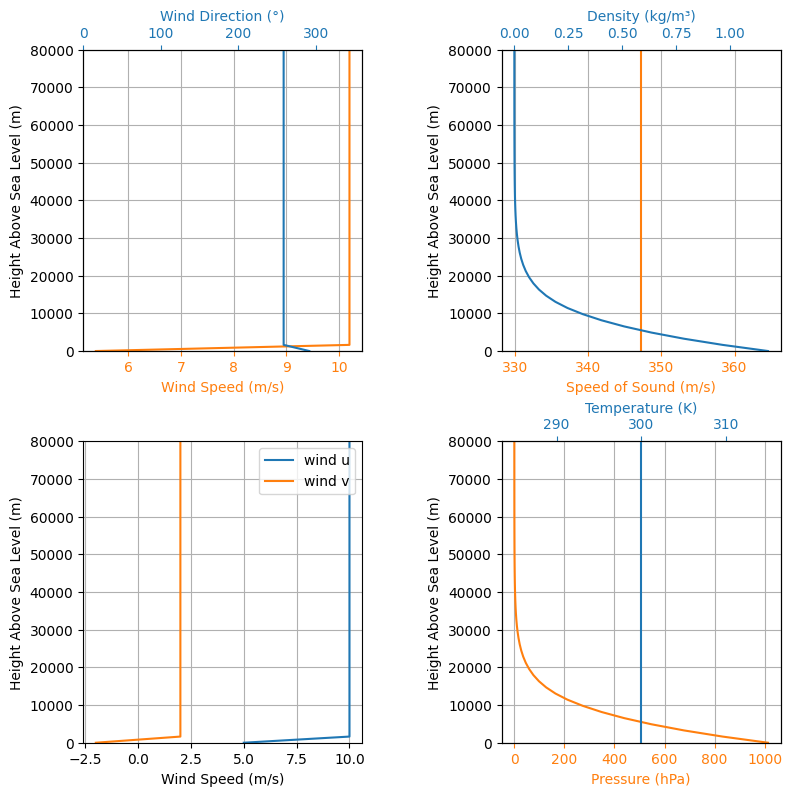

In [ ]:
env_custom_atm.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=None,
    temperature=300,
    wind_u=[
        (0, 5),    # 5 m/s na 0 m
        (1000, 10) # 10 m/s na 1000 m
    ],
    wind_v=[
        (0, -2),   # -2 m/s na 0 m
        (500, 3),  # 3 m/s na 500 m
        (1600, 2), # 2 m/s na 1600 m
    ],
)

env_custom_atm.plots.atmospheric_model()

Możemy dowolnie ustalać parametry atmosfery. Więcej informacji: [RocketPy Custom Atmosphere Documentation](https://docs.rocketpy.org/en/latest/user/environment/1-atm-models/custom_atmosphere.html)

### Prognoza pogody (forecast)

Jeśli chcemy zasymulować warunki, jakie będą panować podczas testu rakiety, możemy użyć prognozy.

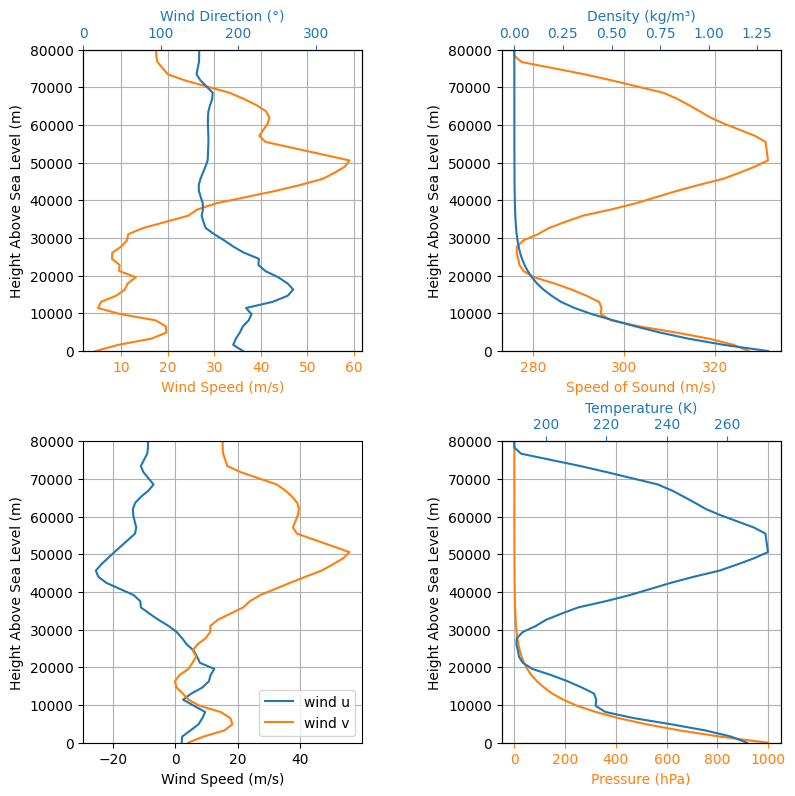

In [ ]:
from datetime import datetime, timedelta
from rocketpy import Environment

tomorrow = datetime.now() + timedelta(days=1)

env_gfs = Environment(date=tomorrow, latitude=80.179577383781776, longitude=20.088008357667263)

env_gfs.set_atmospheric_model(type="forecast", file="GFS")

env_gfs.plots.atmospheric_model()

for other possible forecast providers please see: https://docs.rocketpy.org/en/latest/user/environment/1-atm-models/forecast.html

jest jeszcze opcja żeby użyć danych z jakiegoś balonu meterlogicznego, ale nie widzę zastosowania 


If we want to use previous weather data we can use reanalysis like ERA5 (past data)

Zostaje jeszcze ensemble - czyli złożenie prognóz, przydatne do analizy monte carlo

In [19]:
from datetime import date, timedelta
from rocketpy import Environment

tomorrow = date.today() + timedelta(days=1)

env_gefs = Environment(
    date=(tomorrow.year, tomorrow.month, tomorrow.day, 18),
    latitude=-21.960641,
    longitude=-47.482122,
    elevation=640,
)
env_gefs.set_atmospheric_model(type="Ensemble", file="GEFS")

In [20]:
env_gefs.select_ensemble_member(3) # selects the 3rd forecast member


Gravity Details

Acceleration of gravity at surface level:    9.7856 m/s²
Acceleration of gravity at  31.067 km (ASL): 9.6923 m/s²


Launch Site Details

Launch Date: 2025-12-19 18:00:00 UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 243664.48 W    7569452.20 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 640.0 m


Atmospheric Model Details

Atmospheric Model Type: Ensemble
Ensemble Maximum Height: 31.067 km
Ensemble Time Period: from 2025-12-17 18:00:00 to 2026-01-02 18:00:00 utc
Ensemble Hour Interval: 6 hrs
Ensemble Latitude Range: From -90.0° to 90.0°
Ensemble Longitude Range: From 0.0° to 359.5°
Number of Ensemble Members: 31
Selected Ensemble Member: 3 (Starts from 0)


Surface Atmospheric Conditions

Surface Wind Speed: 2.40 m/s
Surface Wind Direction: 36.36°
Surface Wind Heading: 216.36°
Surface Pressure: 939.24 hPa
Surface Temperature: 297.47 K
Surface Air Density: 1.100 kg/m³
Surface

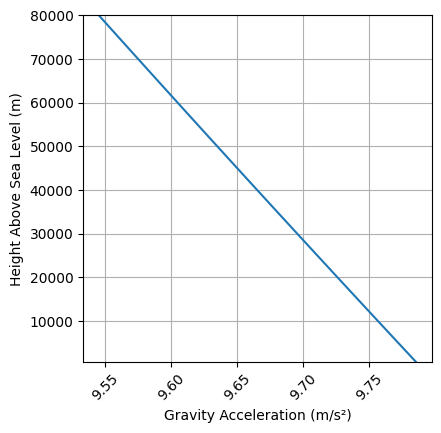



Atmospheric Model Plots


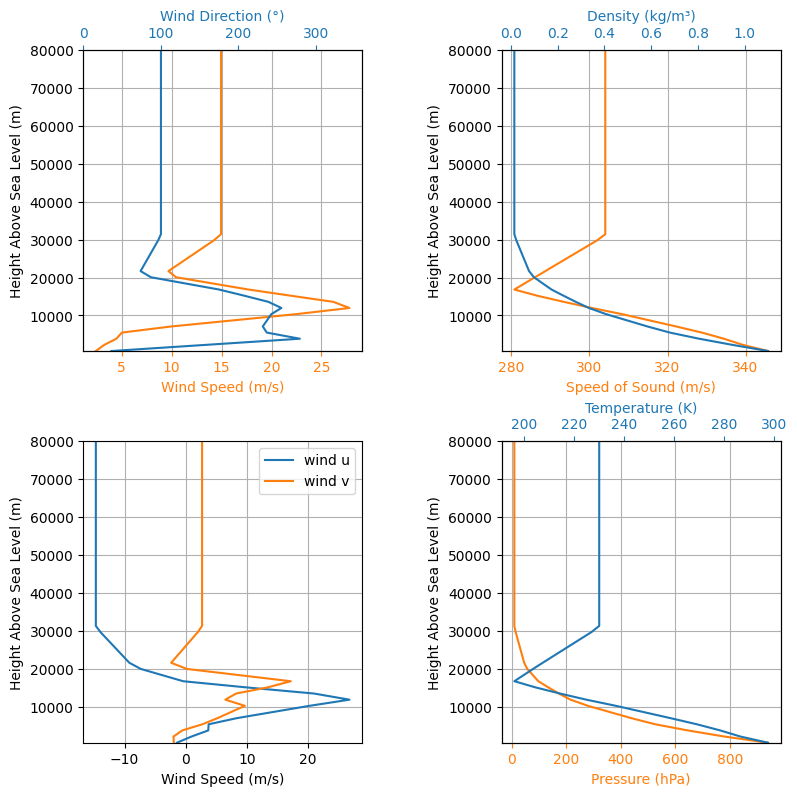



Ensemble Members Comparison


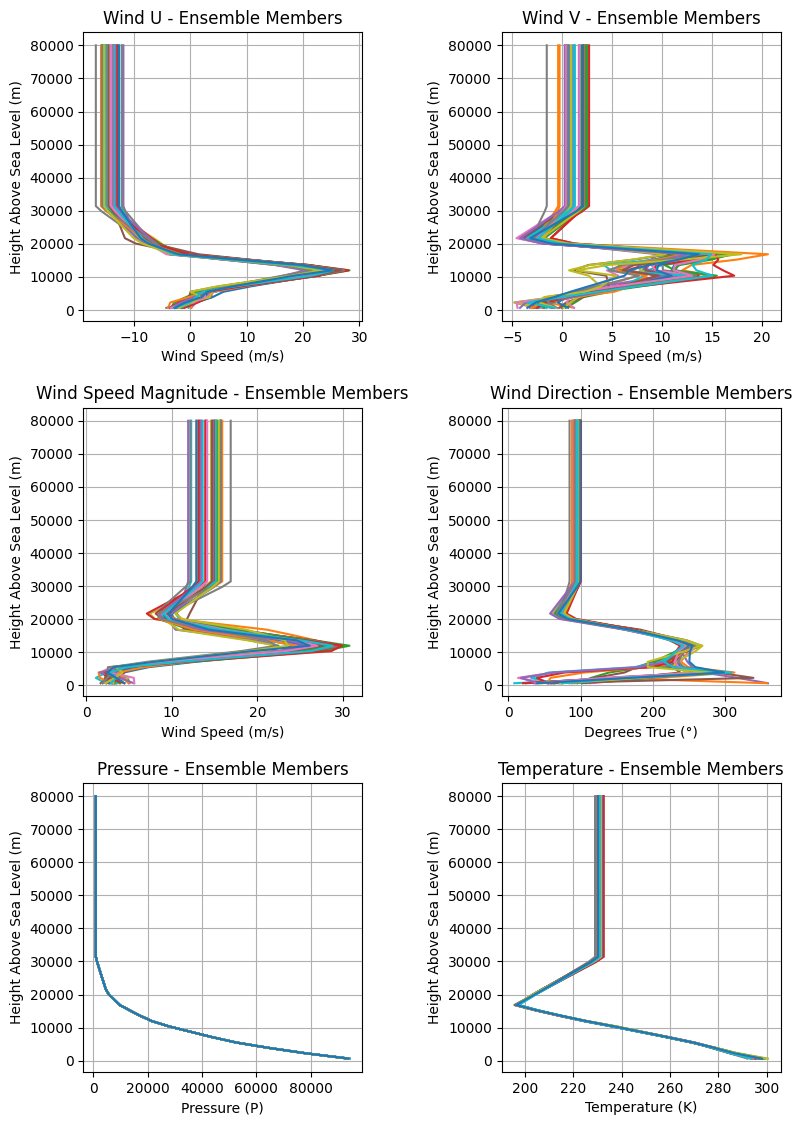

In [21]:
env_gefs.all_info()

Earth model: The Environment class in RocketPy currently supports only a flat Earth model.
Ale można ustawić własną grawitaację, nie wiem po co wsm
Jest jeszcze opcja ustawienie topografii jakbyśmy testowali w jakiś górach czy coś